In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import math


f_vertical = h5py.File("./data/vertical/40587108-e1a8-56ae-8c7f-1853f009b7c6_raw.h5", "r" )
#print (list(f_overhang.keys())

acc_LH = np.array(f_vertical["acc_LH"])
acc_RH = np.array(f_vertical["acc_RH"])
pres_LH = np.array(f_vertical["pres_LH"])
pres_RH = np.array(f_vertical["pres_RH"])
climbing_raw = np.array(f_vertical["climbing"])
#print (*pres_RH)
print (acc_LH)

[(1.61425979e+09, 0.78078555, 0.70754112,  0.29737236)
 (1.61425979e+09, 0.81083219, 0.67654061,  0.28067977)
 (1.61425979e+09, 0.80549592, 0.59805331,  0.29098988) ...
 (1.61426031e+09, 0.65406866, 0.0997303 , -0.73616338)
 (1.61426031e+09, 0.66102017, 0.08749309, -0.73469782)
 (1.61426031e+09, 0.66558768, 0.08911501, -0.73771876)]


In [3]:
#from scipy import stats
#df_cleaned = df[(np.abs(stats.zscore(df["Left_AP"])) < 3)]

In [4]:
def extract(lst, index): 
    return np.array([item[index] for item in lst]) 

In [5]:
relevantStamps = []

for is_climbing in climbing_raw:
    if is_climbing[1]!= 0:
        relevantStamps.append(is_climbing[0])

print (len(relevantStamps))

acc_LH_relevant= []

for dat in acc_LH:
    if dat[0] in relevantStamps :
        acc_LH_relevant.append(dat)

#print (acc_LH_relevant)


3174


In [6]:
print(relevantStamps[0])

1614259836.5


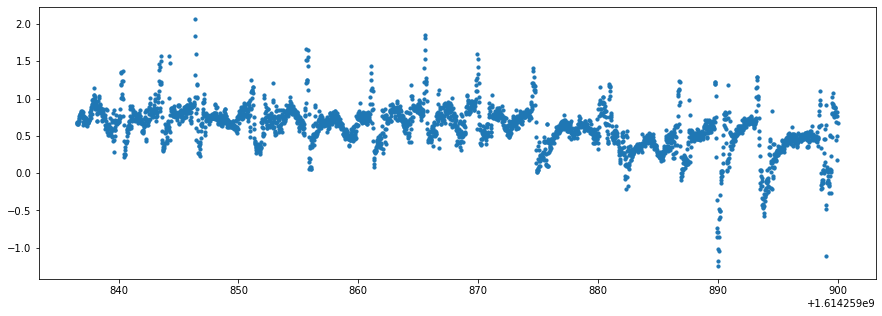

In [7]:
plt.figure(figsize=(15,5))
plt.scatter(extract(acc_LH_relevant, 0), extract(acc_LH_relevant, 1), s=10)
plt.show()
#linke Hand alle relevanten Moves

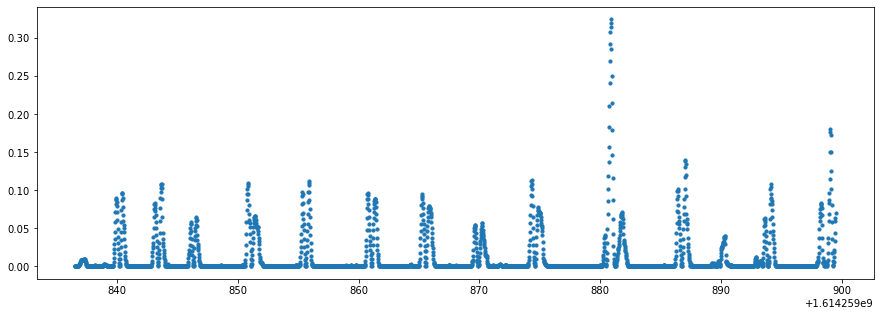

In [8]:
#running average for left Hand
nForConvolution = 25
tmp1 = np.convolve(extract(acc_LH_relevant,1), np.ones(nForConvolution)/nForConvolution, mode='valid')
tmp2 = np.convolve(extract(acc_LH_relevant,2), np.ones(nForConvolution)/nForConvolution, mode='valid')
tmp3 = np.convolve(extract(acc_LH_relevant,3), np.ones(nForConvolution)/nForConvolution, mode='valid')

tmp4 = 0

acc_LH_relevant_conv =[]
for i in range(len(acc_LH_relevant[:-(nForConvolution-1)])):
    
    acc_LH_relevant_conv.append([acc_LH_relevant[i][0],tmp1[i], tmp2[i], tmp3[i], ((math.sqrt(tmp1[i]**2+tmp2[i]**2+tmp3[i]**2))-1)**2])
    
plt.figure(figsize=(15,5))
plt.scatter(extract(acc_LH_relevant_conv, 0), extract(acc_LH_relevant_conv, 4), s=10)
plt.show()

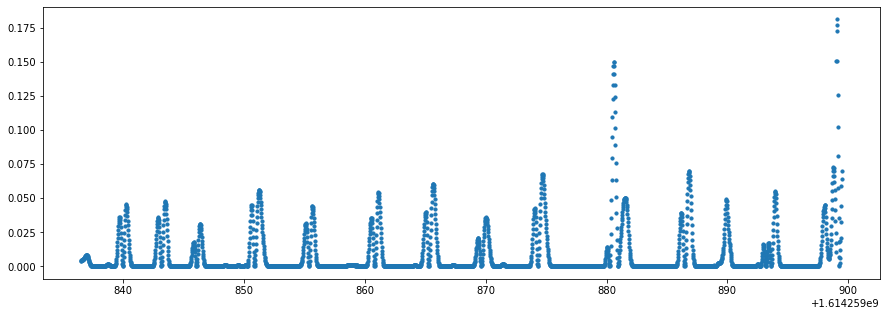

In [9]:
nForConvolution = 25
tmp1 = np.convolve(extract(acc_LH_relevant_conv,1), np.ones(nForConvolution)/nForConvolution, mode='valid')
tmp2 = np.convolve(extract(acc_LH_relevant_conv,2), np.ones(nForConvolution)/nForConvolution, mode='valid')
tmp3 = np.convolve(extract(acc_LH_relevant_conv,3), np.ones(nForConvolution)/nForConvolution, mode='valid')

tmp4 = 0


for i in range(len(acc_LH_relevant_conv[:-(nForConvolution-1)])):
    
    acc_LH_relevant_conv[i] = [acc_LH_relevant_conv[i][0],tmp1[i], tmp2[i], tmp3[i], ((math.sqrt(tmp1[i]**2+tmp2[i]**2+tmp3[i]**2))-1)**2]
    
plt.figure(figsize=(15,5))
plt.scatter(extract(acc_LH_relevant_conv, 0), extract(acc_LH_relevant_conv, 4), s=10)
plt.show()

In [10]:
for i in range(len(acc_LH_relevant_conv)):
    
    acc_LH_relevant_conv[i][0] = acc_LH_relevant_conv[i][0]
    acc_LH_relevant_conv[i][0] = np.around(acc_LH_relevant_conv[i][0],2)

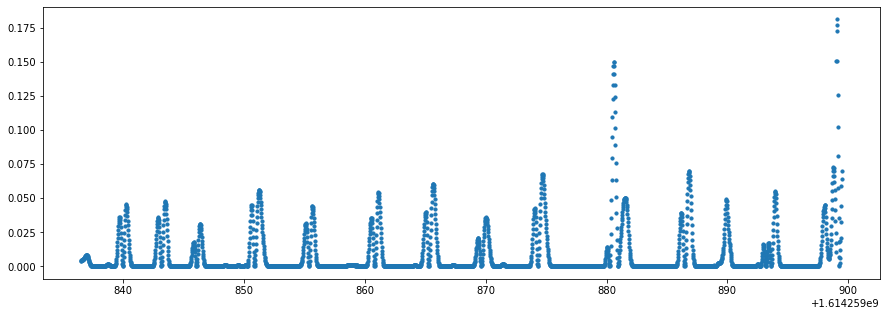

In [11]:
plt.figure(figsize=(15,5))
plt.scatter(extract(acc_LH_relevant_conv, 0), extract(acc_LH_relevant_conv, 4), s=10)
plt.show()

In [12]:
for i in range(len(acc_LH_relevant_conv)):
    if acc_LH_relevant_conv[i][4] <= 0.0125:
        acc_LH_relevant_conv[i][4] = 0
    

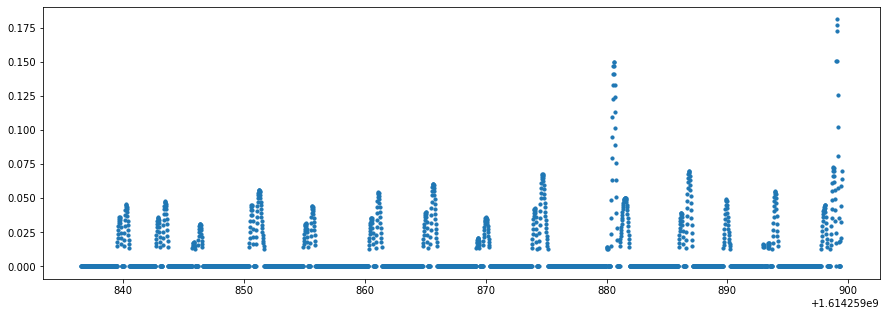

In [13]:
plt.figure(figsize=(15,5))
plt.scatter(extract(acc_LH_relevant_conv, 0), extract(acc_LH_relevant_conv, 4), s=10)
plt.show()

In [14]:
moveTime = []
for i in range(len(acc_LH_relevant_conv)-2):
    if (acc_LH_relevant_conv[i][4]!= 0 and acc_LH_relevant_conv[i+1][4]!= 0 and acc_LH_relevant_conv[i+1][4]!= 0):
        moveTime.append (acc_LH_relevant_conv[i+1])

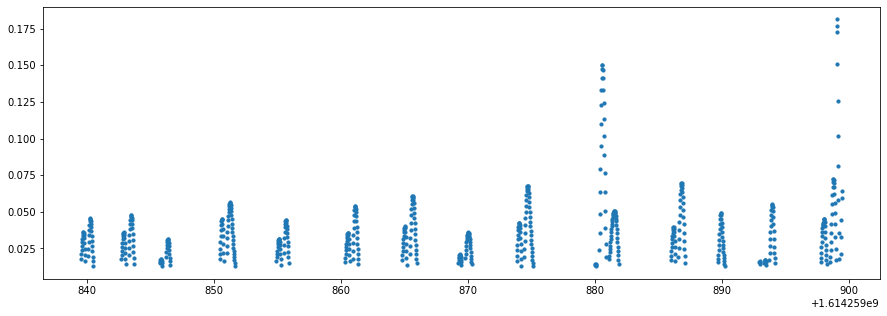

In [15]:
plt.figure(figsize=(15,5))
plt.scatter(extract(moveTime, 0), extract(moveTime, 4), s=10)
plt.show()

In [16]:
diffs= []
for i in range(len(moveTime)-1):
    diffs.append(moveTime[i+1][0] - moveTime[i][0])


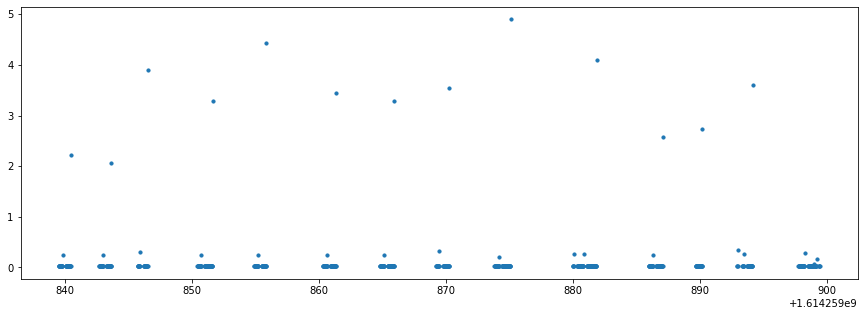

In [17]:
plt.figure(figsize=(15,5))
plt.scatter(extract(moveTime, 0)[:-1], diffs, s=10)
plt.show()

In [18]:
print (sum(diffs)/len(diffs))

0.09714748793714824


In [19]:
startTimes = []
startTimes.append(moveTime[0][0])
endTimes = []
meanOfdiffs= sum(diffs)/len(diffs)
for i in range(len(diffs)):
    if (diffs[i]>= 8*meanOfdiffs):
                 endTimes.append(moveTime[i][0])
                 startTimes.append(moveTime[i+1][0])
startTimes = startTimes[:-1]

In [20]:
#offset in seconds

from datetime import datetime
from datetime import timedelta


offset = 36966/1000 -2.5 #+(11.674-13.880)
FirstAccTimestamp = 1.61425979e+09

In [21]:
def convertToVideoTime(timeData):
    deltaToStart = datetime.fromtimestamp(timeData)- (datetime.fromtimestamp(FirstAccTimestamp))
    #print (deltaToStart)
    videoTime = deltaToStart- timedelta(seconds = offset)
    #return video seconds
    return videoTime

In [22]:
startTimesInVideo = []
endTimesInVideo = []

for i in range(len(endTimes)):
    endTimesInVideo.append(convertToVideoTime(endTimes[i]).total_seconds())
for i in range(len(startTimes)):
    startTimesInVideo.append(convertToVideoTime(startTimes[i]).total_seconds())


In [23]:
print (startTimesInVideo)
print (endTimesInVideo)

[15.054, 18.234, 21.274, 25.974, 30.454, 35.854, 40.354, 44.774, 49.374, 55.554, 61.514, 65.214, 68.494]
[16.014, 19.214, 22.074, 27.174, 31.414, 36.914, 41.494, 45.834, 50.654, 57.414, 62.634, 65.754, 69.714]


In [24]:
print(endTimesInVideo+(np.ones(len(endTimesInVideo))*0.5))

[16.514 19.714 22.574 27.674 31.914 37.414 41.994 46.334 51.154 57.914
 63.134 66.254 70.214]
